<a href="https://colab.research.google.com/github/DanielleRomanoff/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [0]:
# From provided archive
breast_cancer = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

In [6]:
df = pd.read_csv(breast_cancer)
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [7]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data | wc  # No header

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3103  100  3103    0     0  22649      0 --:--:-- --:--:-- --:--:-- 22649
    306     306    3103


In [8]:
df = pd.read_csv(breast_cancer, header=None)
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [9]:
breast_cancer_headers = ['Age of patient', 'Year of operation','Number of positive nodes detected', 'Survival status']
df = pd.read_csv(breast_cancer, header=None, names=breast_cancer_headers)
df.head()

,Age of patient,Year of operation,Number of positive nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [10]:
# Check the data for...? missing values!
df.isna().sum().sum()

0

In [0]:
df['Survival status'].replace(2,0, inplace=True)

In [26]:
df.head()

,Age of patient,Year of operation,Number of positive nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
import numpy as np
import pandas as pd

In [28]:
from collections import namedtuple
pd.crosstab(df['Age of patient'], df['Survival status'])

Survival status,0,1
Age of patient,,
30,0,3
31,0,2
33,0,2
34,2,5
35,0,2
36,0,2
37,0,6
38,1,9
39,1,5


In [0]:
pd.crosstab(df['Age of patient'], df['Number of positive nodes detected'])

Number of positive nodes detected,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
Age of patient,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,2,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,3,2,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
39,4,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.count()

Age of patient                       306
Year of operation                    306
Number of positive nodes detected    306
Survival status                      306
dtype: int64

In [0]:
df.iloc[20]

Age of patient                       37
Year of operation                    58
Number of positive nodes detected     0
Survival status                       1
Name: 20, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age of patient                       306 non-null int64
Year of operation                    306 non-null int64
Number of positive nodes detected    306 non-null int64
Survival status                      306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [0]:
df.shape

(306, 4)

In [0]:
!pip install seaborn --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
breast_cancer = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
df = pd.read_csv(breast_cancer)

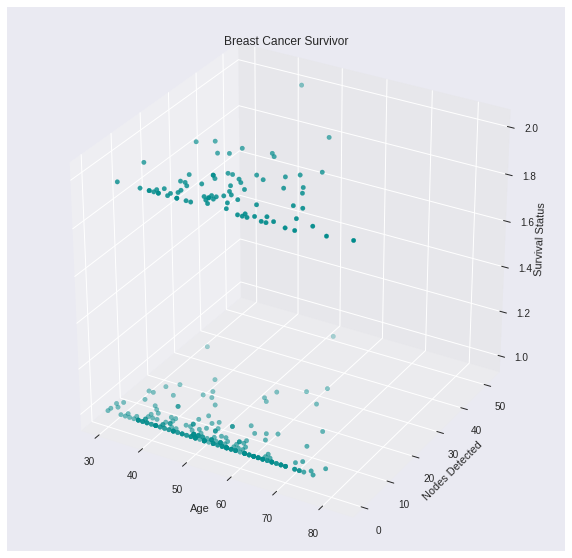

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
breast_cancer_headers = ['Age of patient', 'Year of operation','Number of positive nodes detected', 'Survival status']
df = pd.read_csv(breast_cancer, header=None, names=breast_cancer_headers)

# for c, m, zlow, zhigh in [('r', 'o', 0, n), ('b', '^', 0, 1200)]:
x = df[['Age of patient']] 
y = df[['Number of positive nodes detected']]
z = df[['Survival status']]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, marker = 'o', color = 'darkcyan')

ax.set_xlabel('Age')
ax.set_ylabel('Nodes Detected')
ax.set_zlabel('Survival Status')
ax.set_title('Breast Cancer Survivor')

plt.show()

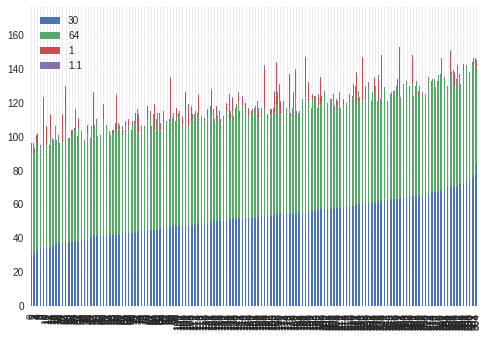

In [0]:
df.plot(kind='bar', stacked = True) 

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1) Nodes detected affected the survival rate. The more nodes, the increased chance of not surviving
2) The year the operation was performed didn't seem to affect the outcome
3) The surgery hadn't improved or gotten worse over those years specified so they were not related to the number of nodes detected. It was kind of like a null value.